# Imports

In [81]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pandas.plotting import parallel_coordinates
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load Cleaned Dataset

In [73]:
df = pd.read_csv('loan_cleaned.csv').drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
df.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8
top,NaN,male,NaN,own,little,little,NaN,NaN,car
freq,NaN,690,NaN,713,779,462,NaN,NaN,337
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN


# Apply Mapping

In [74]:
df_mapped = df.copy()

sex_mapping = {'female': 0, 'male': 1}
housing_mapping = {'rent': 0, 'free': 1, 'own': 2}
saving_account_mapping = {'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3}
checking_account_mapping = {'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3}
purpose_mapping = {
    'car': 0, 'furniture/equipment': 1, 'radio/TV': 2, 'domestic appliances': 3,
    'repairs': 4, 'education': 5, 'business': 6, 'vacation/others': 7
}
df_mapped['Sex'] = df_mapped['Sex'].map(sex_mapping)
df_mapped['Housing'] = df_mapped['Housing'].map(housing_mapping)
df_mapped['Saving accounts'] = df_mapped['Saving accounts'].map(saving_account_mapping)
df_mapped['Checking account'] = df_mapped['Checking account'].map(checking_account_mapping)
df_mapped['Purpose'] = df_mapped['Purpose'].map(purpose_mapping)

# Scaling

In [75]:
cols_to_scale = ['Age', 'Credit amount', 'Duration']
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df_mapped[cols_to_scale]), columns=cols_to_scale)
df_mapped[cols_to_scale] = df_scaled

# Parallel Plots

## Sex
- most high paid jobs belong to men
- women appear to don't own houses as much as men
- women tend to have higher amounts in saving and checking account than men
- women tend to spend more on furniture/equipment, radio/TV, domestic appliances and vacation/others

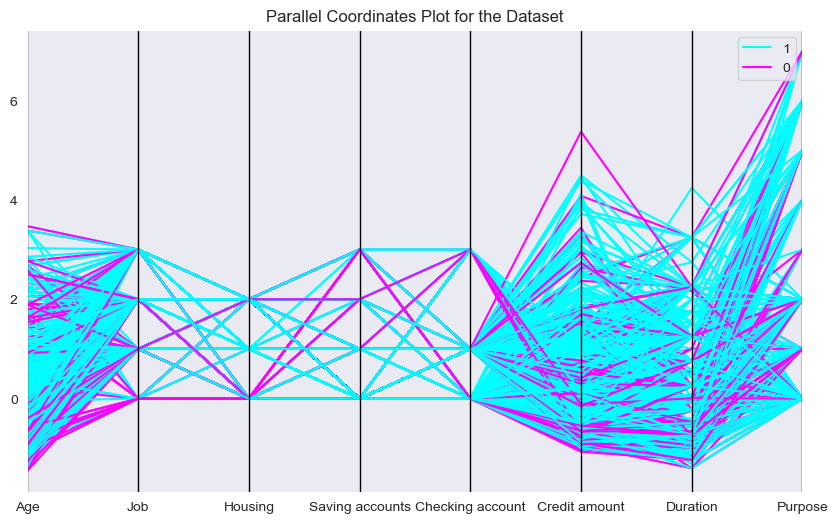

In [76]:
plt.figure(figsize=(10,6))
parallel_coordinates(df_mapped, class_column='Sex', colormap=plt.get_cmap("cool"))
plt.title("Parallel Coordinates Plot for the Dataset")
plt.show()

## Housing
- young men tend rent more than other ages
- higher checking accounts belong to people who own houses

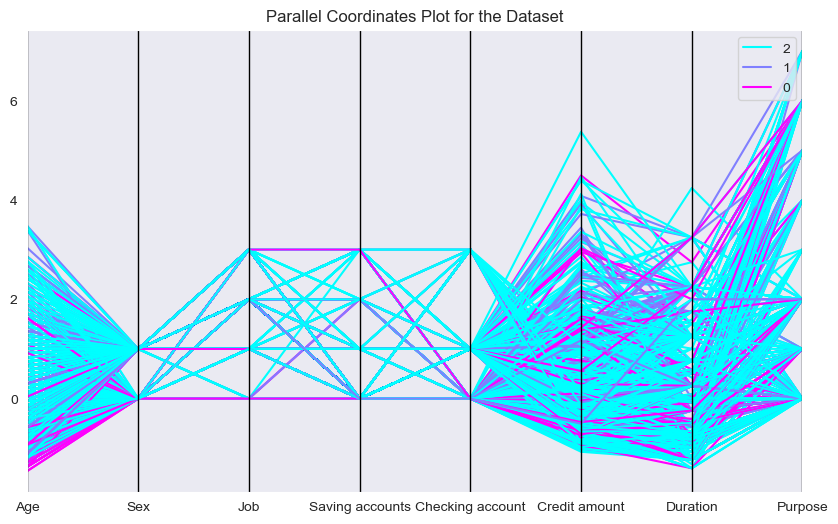

In [77]:
plt.figure(figsize=(10,6))
parallel_coordinates(df_mapped, class_column='Housing', colormap=plt.get_cmap("cool"))
plt.title("Parallel Coordinates Plot for the Dataset")
plt.show()

## Purpose
- high credit amounts were given for vacation/others, which it can suggest fraud or unbalanced loan distribution
- car loan has been requested by people with high paid jobs

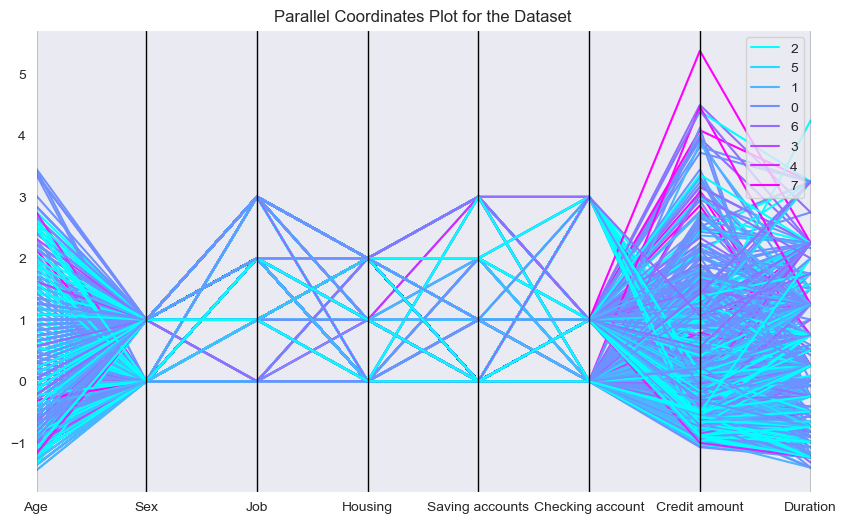

In [78]:
plt.figure(figsize=(10,6))
parallel_coordinates(df_mapped, class_column='Purpose', colormap=plt.get_cmap("cool"))
plt.title("Parallel Coordinates Plot for the Dataset")
plt.show()

# Correlation Heatmap
**Most Correlated Pairs:**

1. Sex vs. Housing:  
   Men are more likely to own houses than women, likely reflecting traditional socio-economic patterns.

2. Job vs. Credit Amount:  
   Higher job categories and income are associated with higher credit amounts, as stable employment increases creditworthiness.

3. Job vs. Duration:  
   People with better jobs tend to secure longer loan durations, likely due to increased financial stability and lower risk.

4. Credit Amount vs. Duration:  
   Larger credit amounts naturally require longer loan durations, making this an expected and logical relationship.

---

**Not Correlated at All:**

1. Age vs. Checking Account:  
   Checking account usage doesn't vary significantly by age, indicating similar habits across age groups.

2. Age vs. Duration:  
   Loan duration isn’t significantly influenced by age, suggesting factors like income and job security play a larger role.

3. Sex vs. Saving Accounts:  
   Gender doesn’t strongly affect saving account balances, showing similar saving habits between males and females.

4. Housing vs. Credit Amount:  
   Housing status (owning/renting) doesn’t impact the credit amount requested, suggesting other factors like income are more influential.

5. Saving Accounts vs. Credit Amount:  
   Savings balances don’t correlate with credit amounts, indicating people with varying savings might still request similar loan amounts.

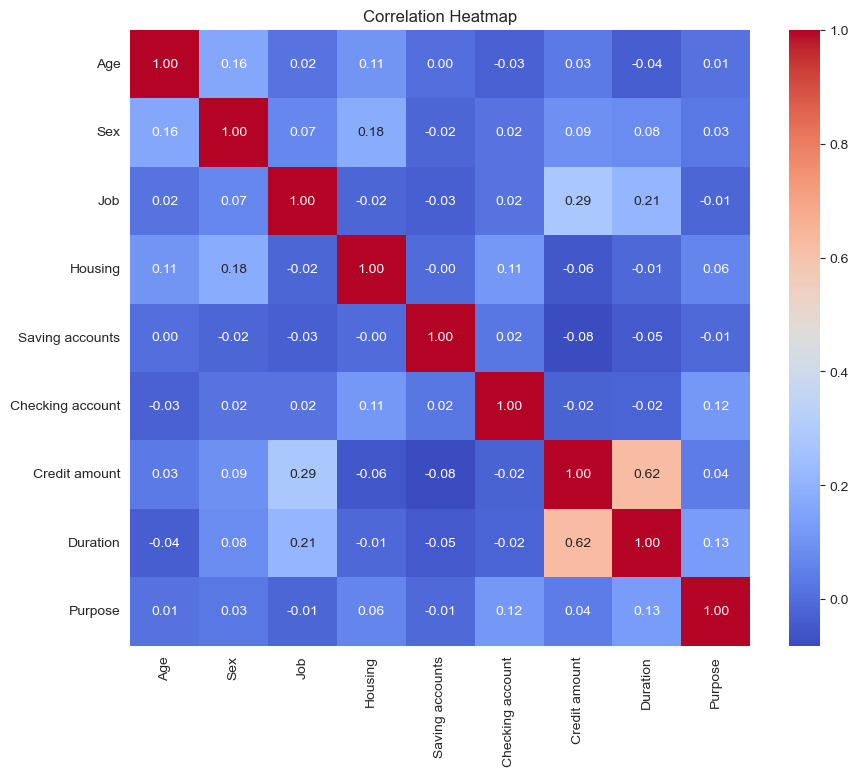

In [80]:
corr = df_mapped.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairwise Comparison
**Key Pairwise Relationships from Pair Plot and Correlation Heatmap:**

1. Age vs. Credit Amount  

2. Age vs. Duration  

3. Age vs. Checking Account  

4. Age vs. Purpose  

5. Age vs. Saving Accounts  

---

1. Sex vs. Credit Amount  

---

1. Job vs. Credit Amount  

2. Job vs. Duration  
---

1. Saving Accounts vs. Credit Amount  

2.  Saving Accounts vs. Duration  

---

1.  Checking Account vs. Credit Amount  

2.  Checking Account vs. Duration  

---

1.  Credit Amount vs. Duration  

2.  Credit Amount vs. Purpose  

---

1.  Duration vs. Purpose  

---

**Less Important Variable:**

- Housing  
- Saving accounts

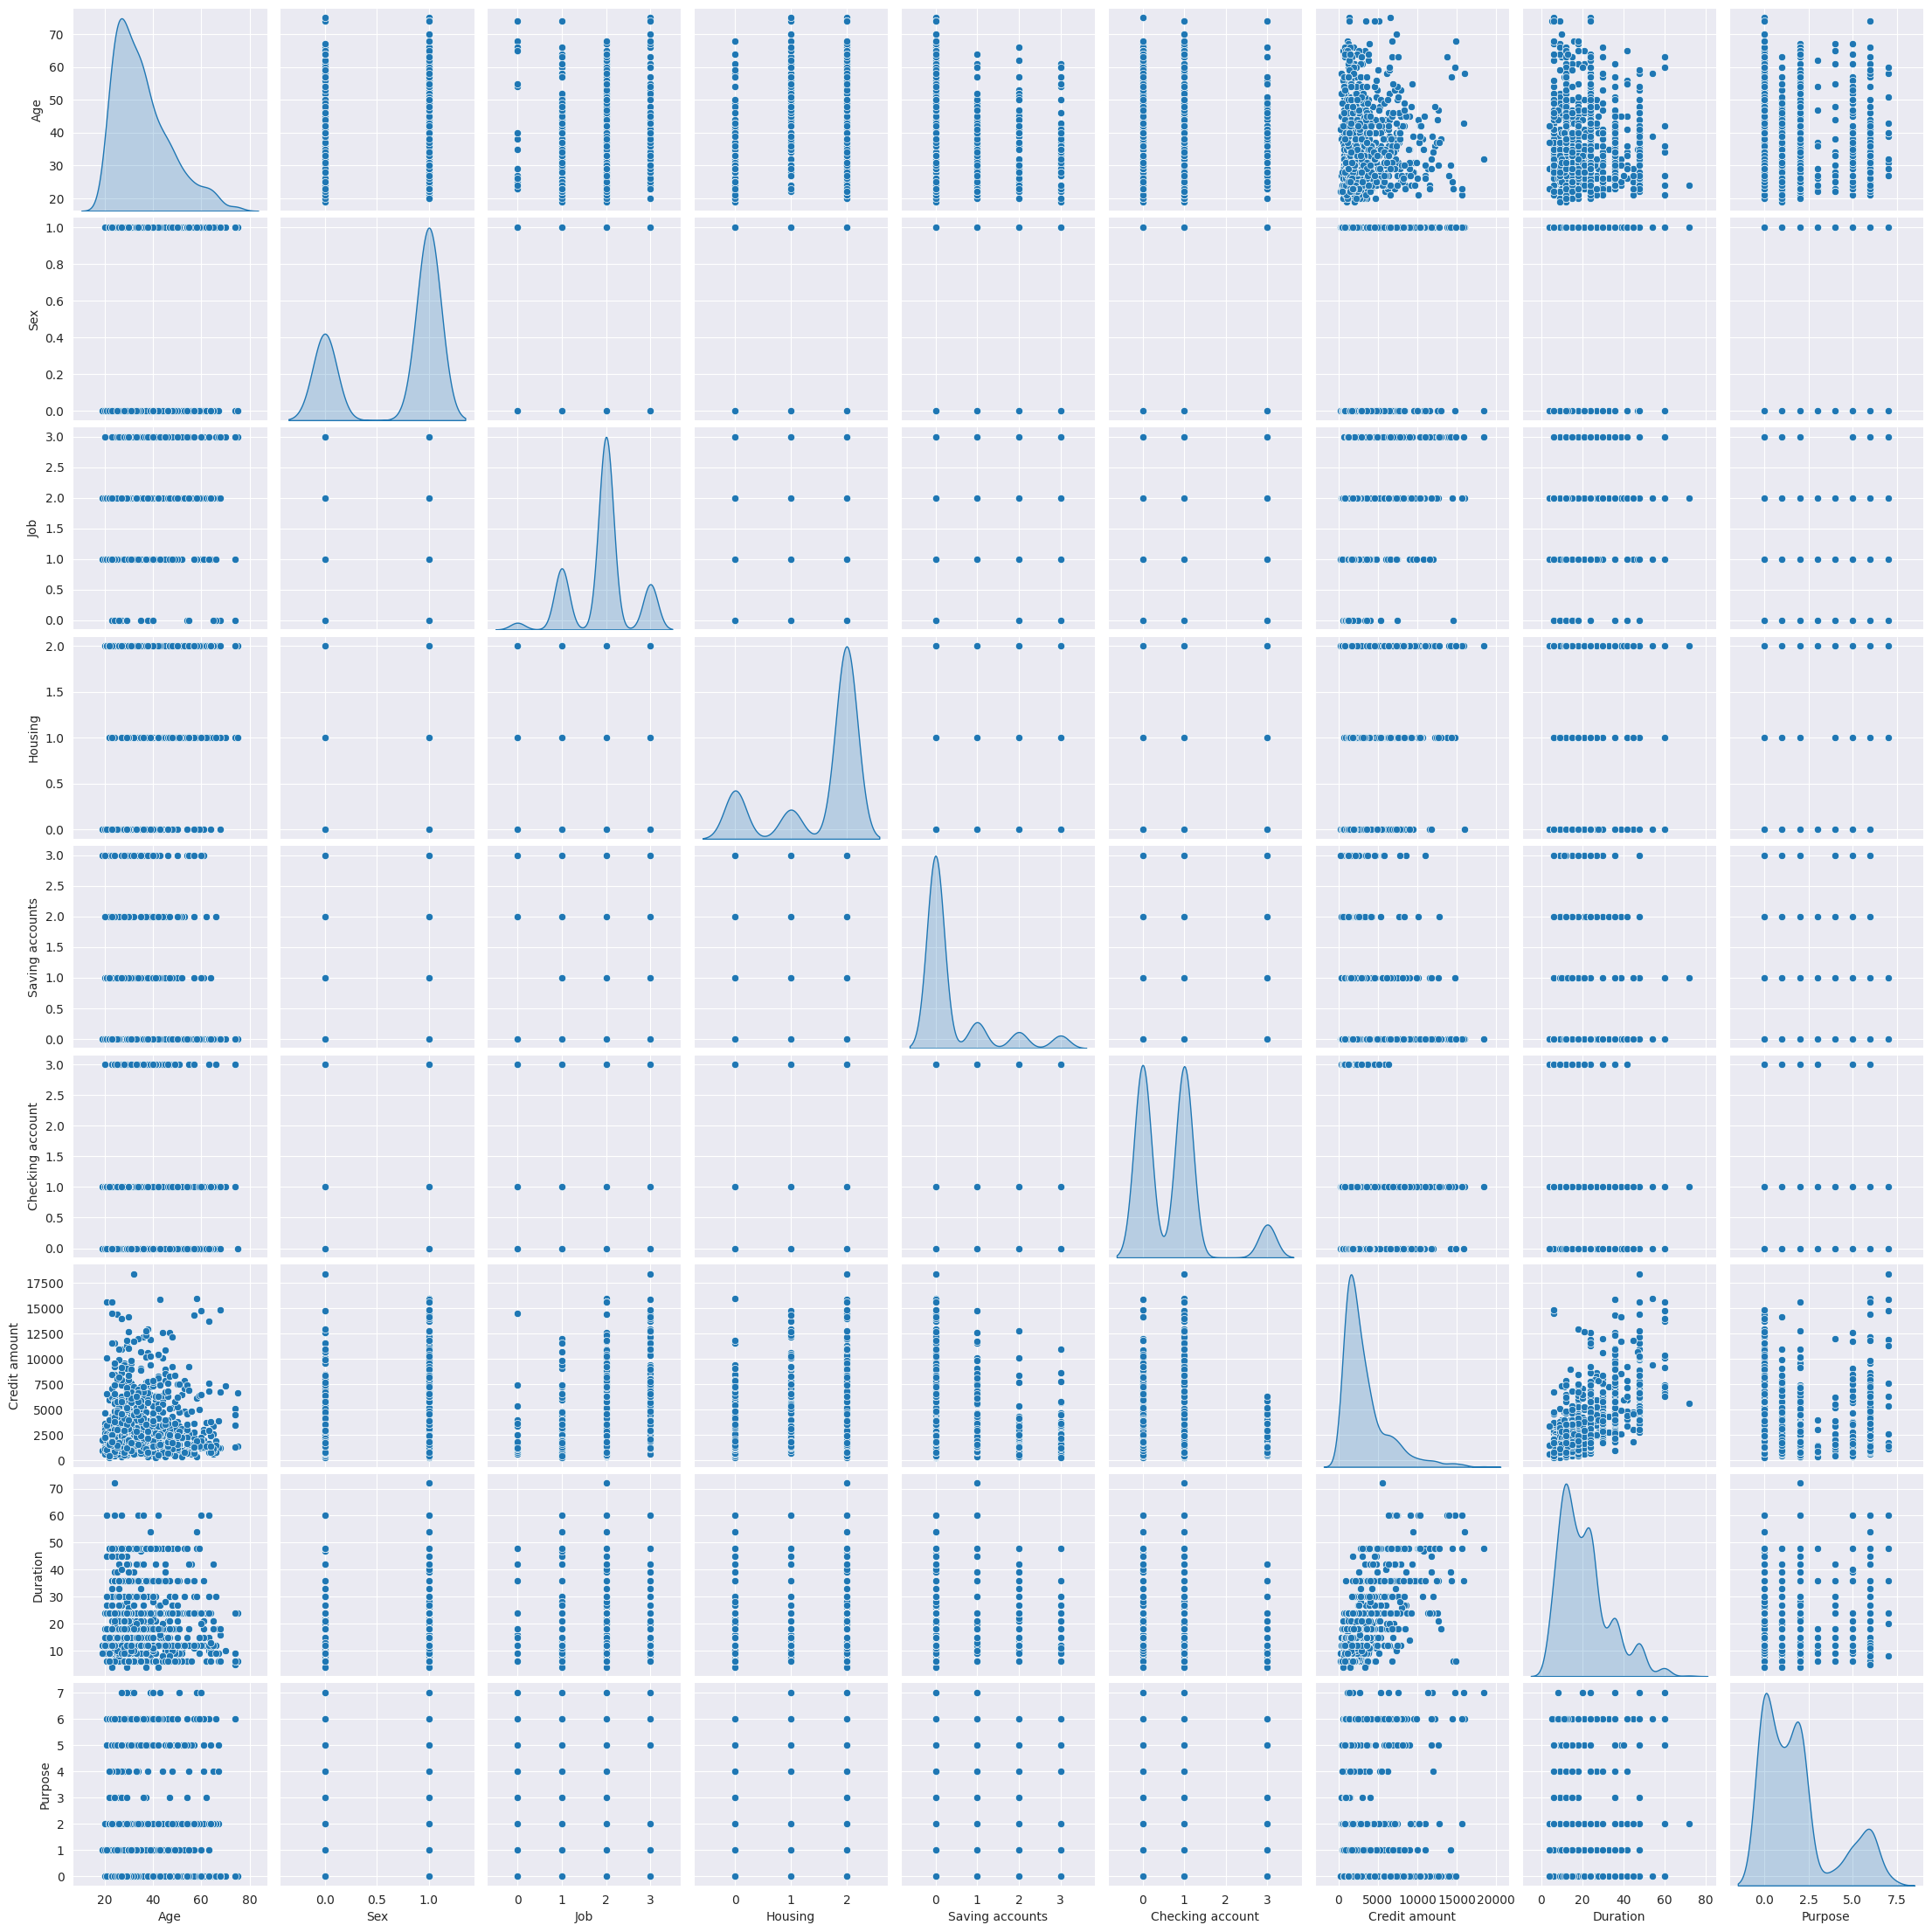

In [3]:
sns.pairplot(df_heatmap,diag_kind='kde')

# Histograms

## Age
- Young people tend to get more loans

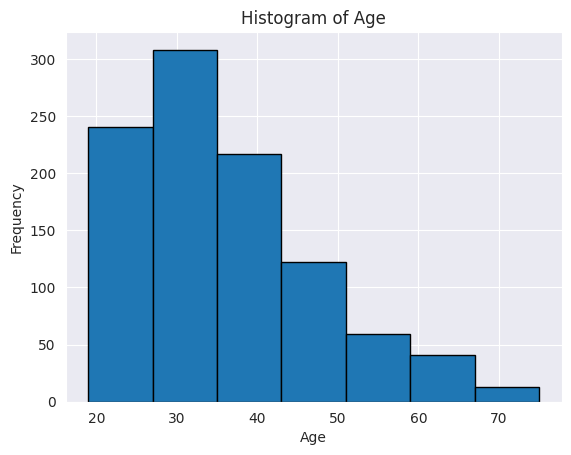

In [4]:
plt.hist(df['Age'], bins=7, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

## Sex
- male requests for loan is double the amount for females

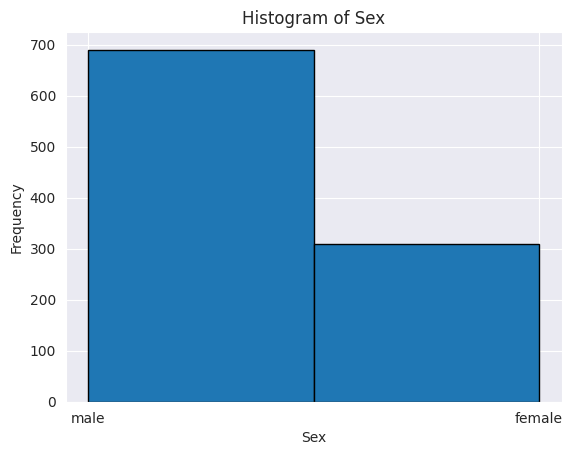

In [5]:
plt.hist(df['Sex'], bins=2, edgecolor='black')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Histogram of Sex')
plt.show()

## Job
- most loan requester had a skilled jobs

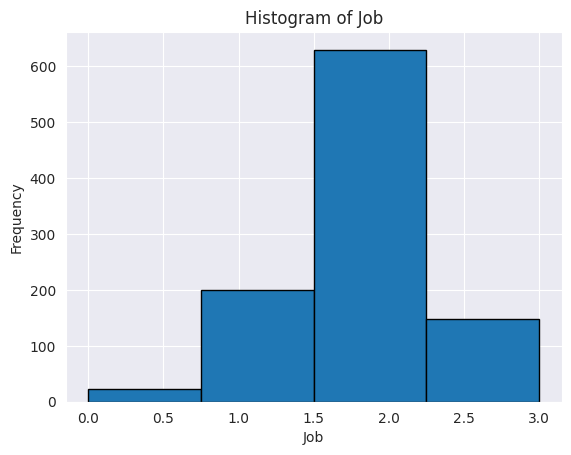

In [6]:
plt.hist(df['Job'], bins=4, edgecolor='black')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.title('Histogram of Job')
plt.show()

## Housing
- most loan requesters already owned a house

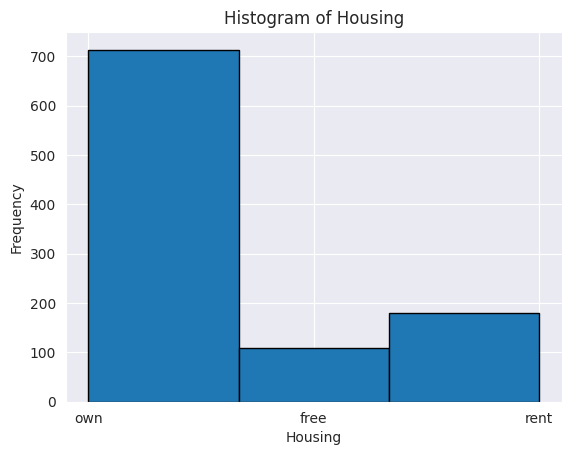

In [7]:
plt.hist(df['Housing'], bins=3, edgecolor='black')
plt.xlabel('Housing')
plt.ylabel('Frequency')
plt.title('Histogram of Housing')
plt.show()

## Credit Amount
- most loan requests were below 10k, maybe applying 10k limit to loans to provide loans for more people

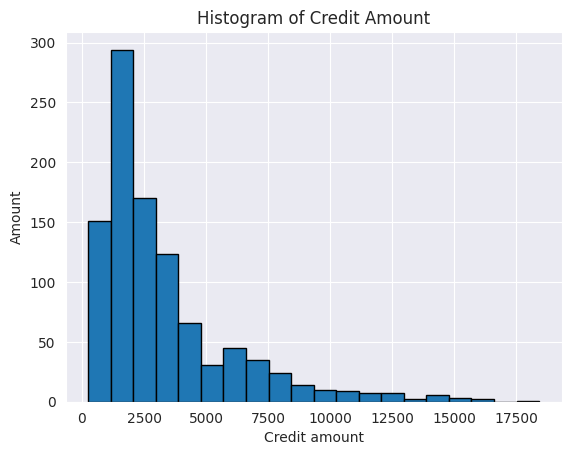

In [8]:
plt.hist(df['Credit amount'], bins=20, edgecolor='black')
plt.xlabel('Credit amount')
plt.ylabel('Amount')
plt.title('Histogram of Credit Amount')
plt.show()

## Purpose
- car and radio/TV are the most picked pusposes for loans

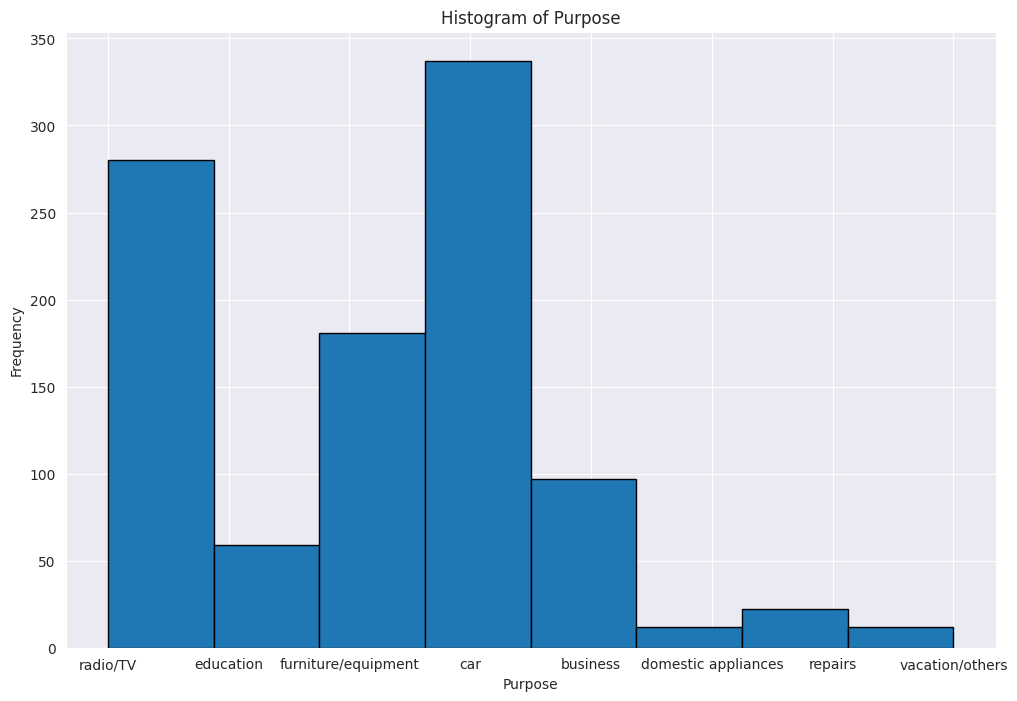

In [9]:
plt.figure(figsize=(12, 8))
plt.hist(df['Purpose'], bins=8, edgecolor='black')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Histogram of Purpose')

plt.show()

# One V.S Others Box Plots 

## Age Vs Others

1. Young People and Higher Loans:  
   Younger individuals tend to receive higher loan amounts.

2. Young People and Loan Duration:  
   Younger people are more likely to secure loans with longer durations.

3. Business Loans by Older People:  
   Older individuals tend to request business loans more frequently.

4. Age 19-34 and 52-62 and Savings:  
   People aged 19-34 and 52-62 tend to have higher savings compared to other age groups.

5. Age 24-40 and Checking Accounts:  
   Younger individuals, primarily aged 24-40, have higher checking account balances than others.

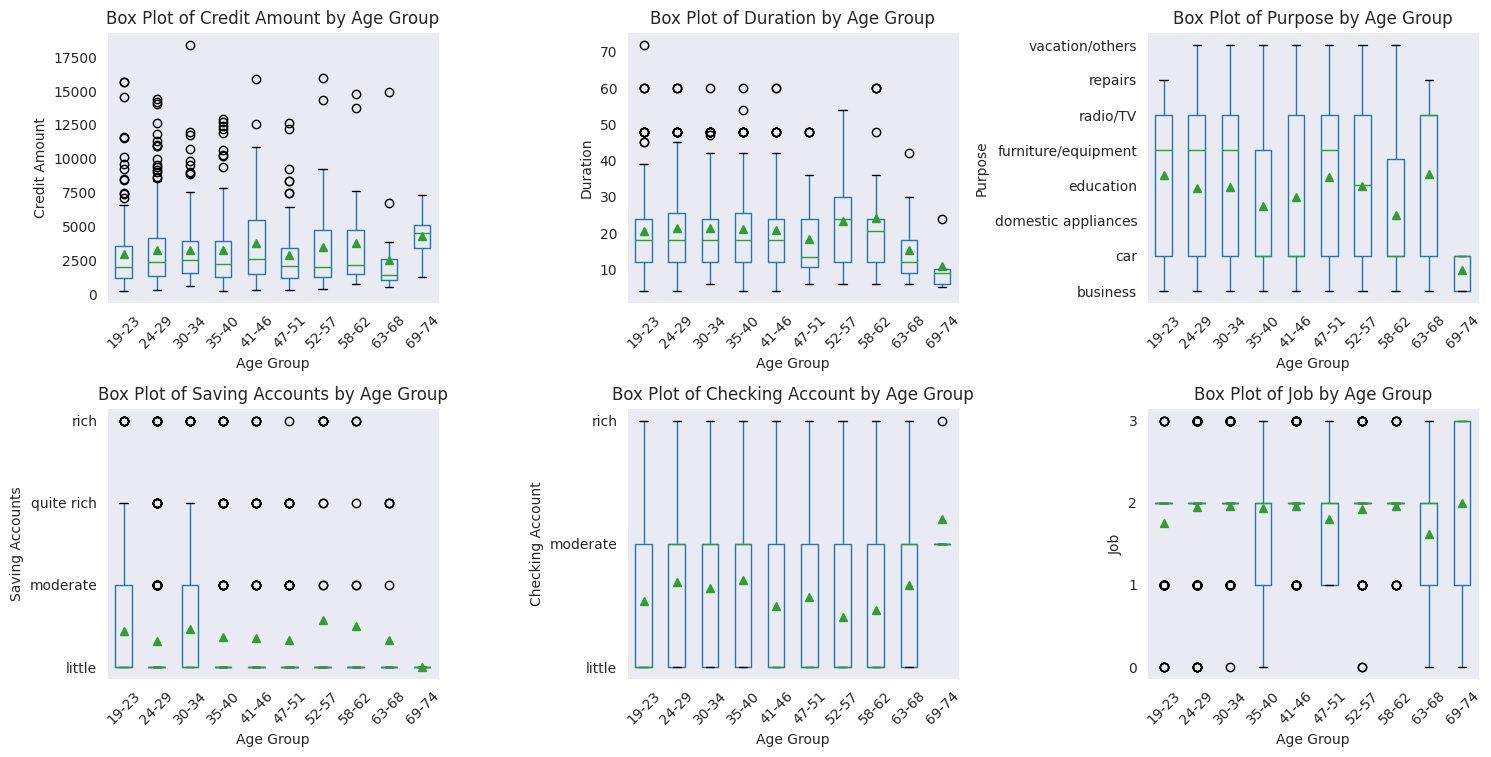

In [10]:
bins = np.linspace(19, 75, 11)  
labels = [f'{int(bins[i])}-{int(bins[i+1]-1)}' for i in range(len(bins)-1)]

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

fig, axs = plt.subplots(2, 3, figsize=(15, 8))  

# Plot 1: Box Plot of Credit Amount by Age Group
df.boxplot(column='Credit amount', by='Age Group', grid=False, showmeans=True, ax=axs[0, 0])
axs[0, 0].set_title('Box Plot of Credit Amount by Age Group')
axs[0, 0].set_xlabel('Age Group')
axs[0, 0].set_ylabel('Credit Amount')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Box Plot of Duration by Age Group
df.boxplot(column='Duration', by='Age Group', grid=False, showmeans=True, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Duration by Age Group')
axs[0, 1].set_xlabel('Age Group')
axs[0, 1].set_ylabel('Duration')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Box Plot of Purpose by Age Group (Need to convert 'Purpose' to numeric or categorize it)
# For simplicity, converting categorical data to numerical codes
df['Purpose Code'] = pd.Categorical(df['Purpose']).codes
df.boxplot(column='Purpose Code', by='Age Group', grid=False, showmeans=True, ax=axs[0, 2])
axs[0, 2].set_title('Box Plot of Purpose by Age Group')
axs[0, 2].set_xlabel('Age Group')
axs[0, 2].set_ylabel('Purpose')
axs[0, 2].tick_params(axis='x', rotation=45)

purpose_labels = pd.Categorical(df['Purpose']).categories
axs[0, 2].set_yticks(range(len(purpose_labels)))
axs[0, 2].set_yticklabels(purpose_labels)

# Plot 4: Box Plot of Saving Accounts by Age Group (Converting categorical data)
df['Saving Accounts Code'] = pd.Categorical(df['Saving accounts']).codes
df.boxplot(column='Saving Accounts Code', by='Age Group', grid=False, showmeans=True, ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of Saving Accounts by Age Group')
axs[1, 0].set_xlabel('Age Group')
axs[1, 0].set_ylabel('Saving Accounts')
axs[1, 0].tick_params(axis='x', rotation=45)

saving_labels = pd.Categorical(df['Saving accounts']).categories
axs[1, 0].set_yticks(range(len(saving_labels)))
axs[1, 0].set_yticklabels(saving_labels)

# Plot 5: Box Plot of Checking Account by Age Group (Converting categorical data)
df['Checking Account Code'] = pd.Categorical(df['Checking account']).codes
df.boxplot(column='Checking Account Code', by='Age Group', grid=False, showmeans=True, ax=axs[1, 1])
axs[1, 1].set_title('Box Plot of Checking Account by Age Group')
axs[1, 1].set_xlabel('Age Group')
axs[1, 1].set_ylabel('Checking Account')
axs[1, 1].tick_params(axis='x', rotation=45)

checking_labels = pd.Categorical(df['Checking account']).categories
axs[1, 1].set_yticks(range(len(checking_labels)))
axs[1, 1].set_yticklabels(checking_labels)

df['Job Code'] = pd.Categorical(df['Job']).codes
df.boxplot(column='Job Code', by='Age Group', grid=False, showmeans=True, ax=axs[1, 2])
axs[1, 2].set_title('Box Plot of Job by Age Group')
axs[1, 2].set_xlabel('Age Group')
axs[1, 2].set_ylabel('Job')
axs[1, 2].tick_params(axis='x', rotation=45)

job_labels = pd.Categorical(df['Job']).categories
axs[1, 2].set_yticks(range(len(job_labels)))
axs[1, 2].set_yticklabels(job_labels)


plt.tight_layout()
plt.suptitle('') 

plt.show()


## Sex V.S Others
- higher loans were received by male mostly

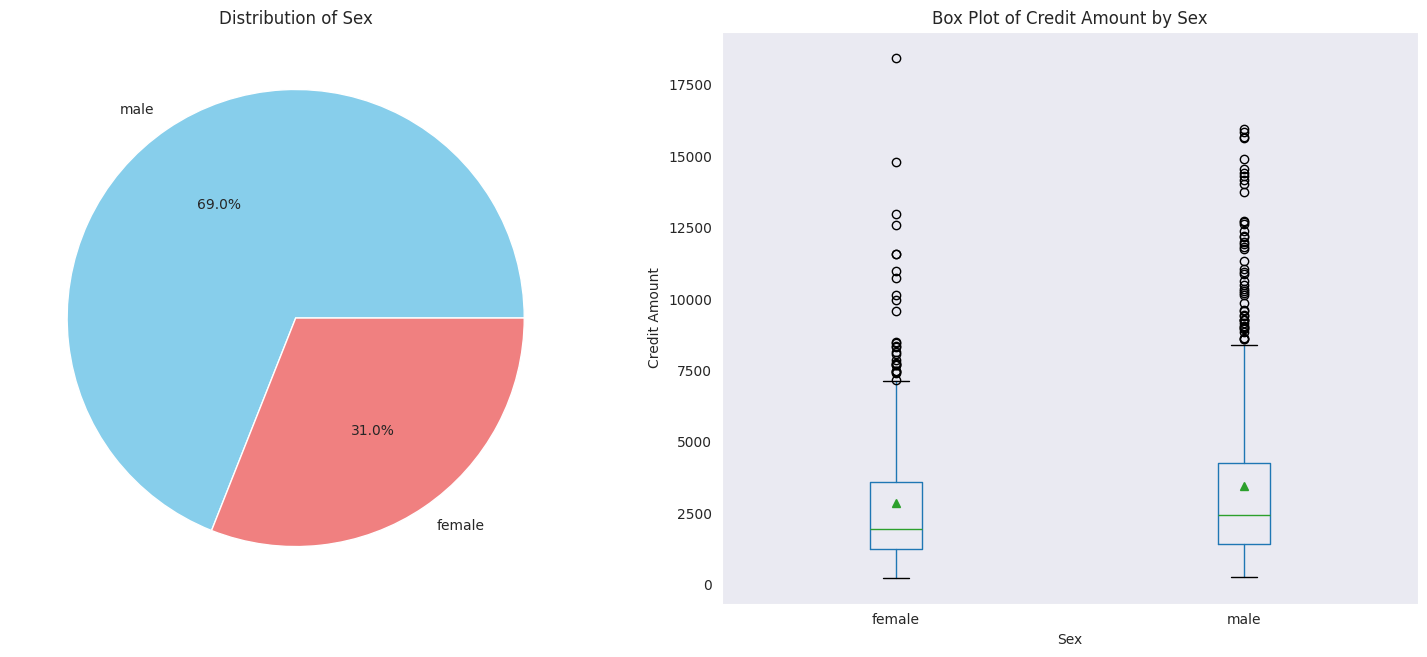

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Circle Plot (Pie Chart) of Sex Distribution
sex_counts = df['Sex'].value_counts()
axs[0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axs[0].set_title('Distribution of Sex')

# Plot 2: Box Plot of Credit Amount by Sex
df.boxplot(column='Credit amount', by='Sex', grid=False, showmeans=True, ax=axs[1])
axs[1].set_title('Box Plot of Credit Amount by Sex')
axs[1].set_xlabel('Sex')
axs[1].set_ylabel('Credit Amount')

# Adjust layout
plt.tight_layout()
plt.suptitle('')  # Remove the default title

plt.show()


## Job V.S Others

- Higher-Paid and Skilled Jobs:  
  Individuals with higher-paid and skilled jobs tend to have loans with longer durations and larger credit amounts, as shown by the histograms and box plots.

- Jobs Distributions:  
  A significant number of loan recipients are employed in skilled jobs, indicating that skilled professions are common among those who take out loans.


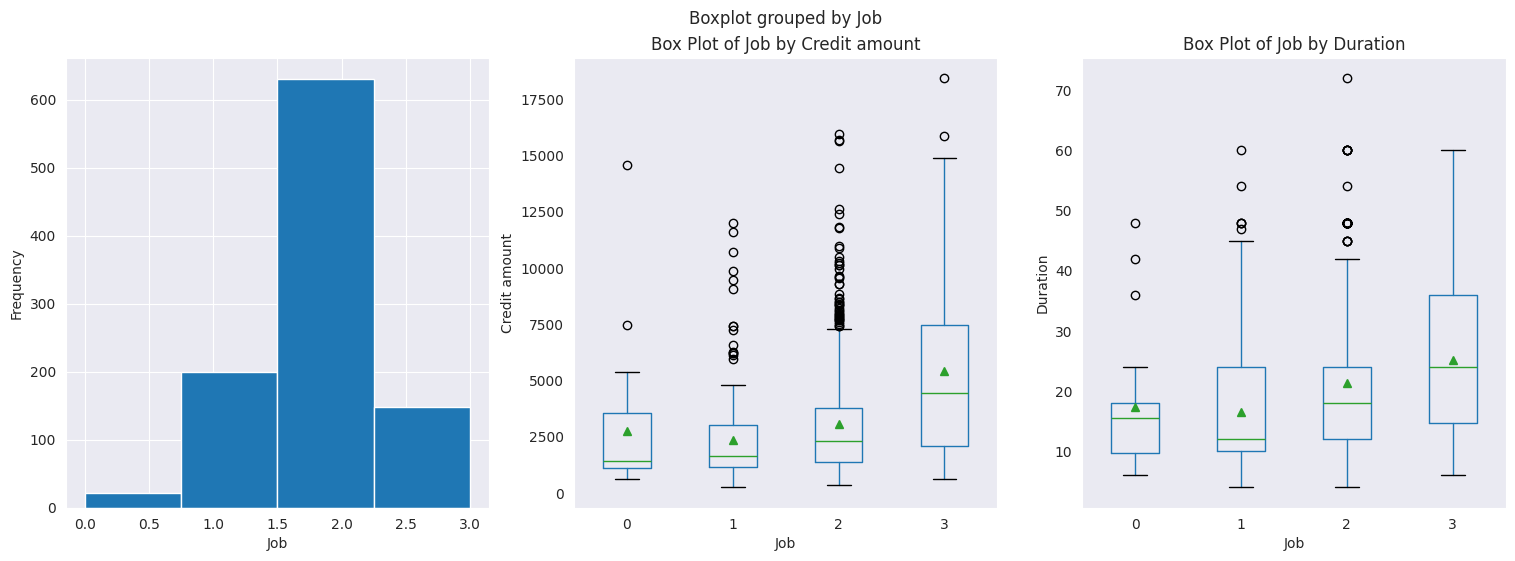

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  

axs[0].hist(df['Job'], bins=4)
axs[0].set_xlabel('Job')
axs[0].set_ylabel('Frequency')


df.boxplot(column='Credit amount', by='Job', grid=False, showmeans=True, ax=axs[1])
axs[1].set_title('Box Plot of Job by Credit amount')
axs[1].set_xlabel('Job')
axs[1].set_ylabel('Credit amount')

df.boxplot(column='Duration', by='Job', grid=False, showmeans=True, ax=axs[2])
axs[2].set_title('Box Plot of Job by Duration')
axs[2].set_xlabel('Job')
axs[2].set_ylabel('Duration');


## Saving Accounts V.S Others
- higher credit amounts were given to people with little savings, which is a bit concerning

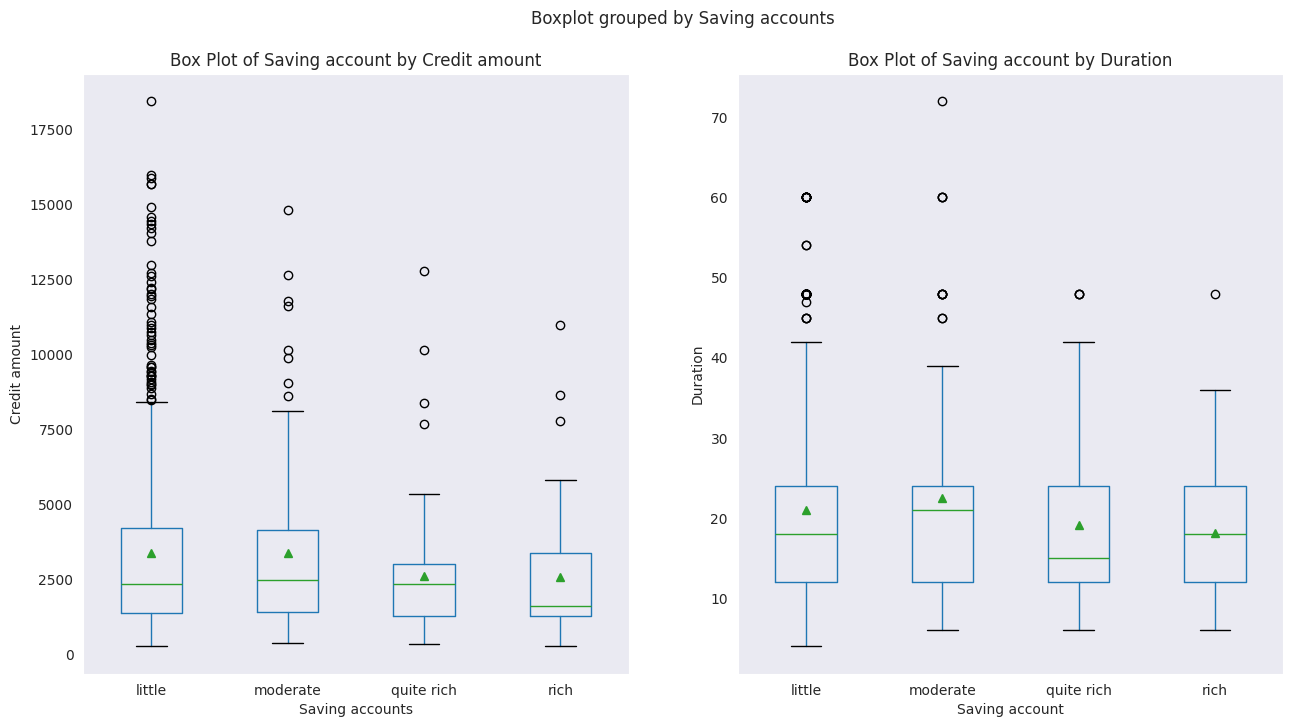

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))  

df.boxplot(column='Credit amount', by='Saving accounts', grid=False, showmeans=True, ax=axs[0])
axs[0].set_title('Box Plot of Saving account by Credit amount')
axs[0].set_xlabel('Saving accounts')
axs[0].set_ylabel('Credit amount')

df.boxplot(column='Duration', by='Saving accounts', grid=False, showmeans=True, ax=axs[1])
axs[1].set_title('Box Plot of Saving account by Duration')
axs[1].set_xlabel('Saving account')
axs[1].set_ylabel('Duration');

## Purpose vs Others

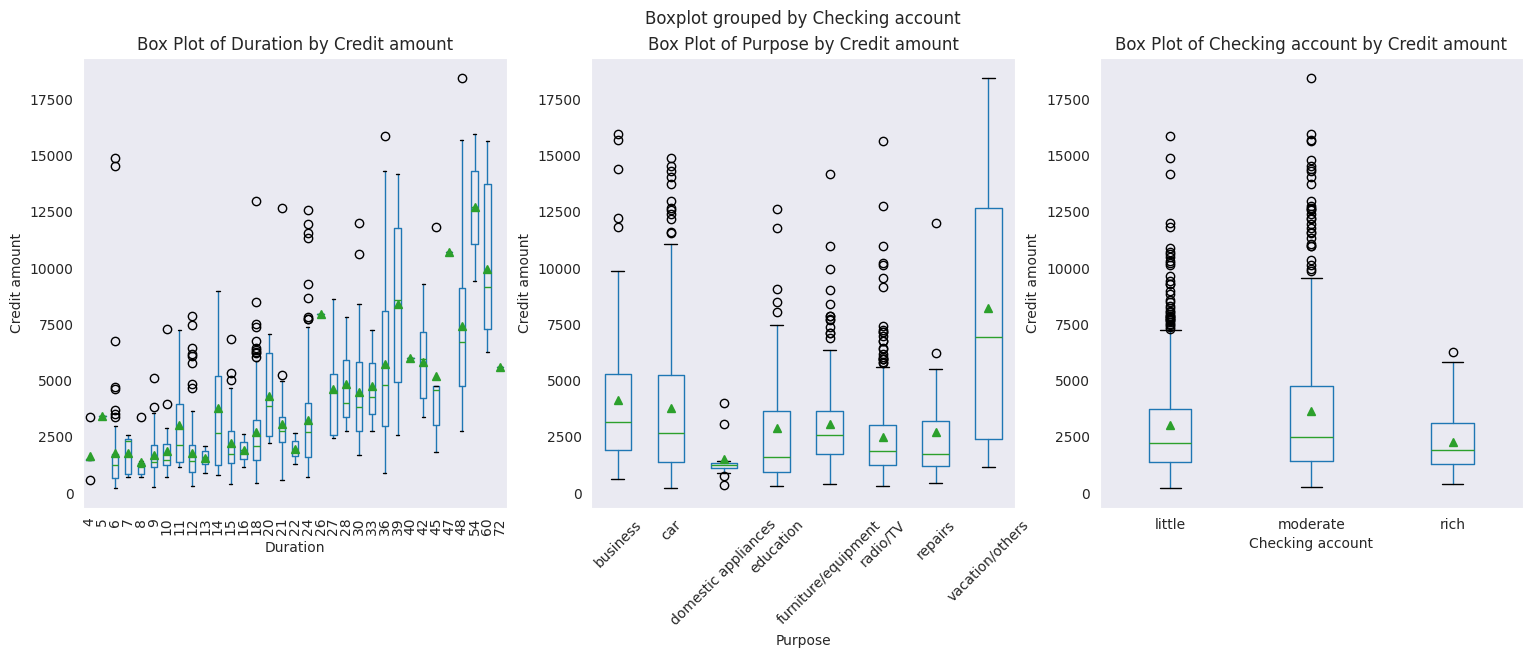

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  

df.boxplot(column='Credit amount', by='Duration', grid=False, showmeans=True, ax=axs[0])
axs[0].set_title('Box Plot of Duration by Credit amount')
axs[0].set_xlabel('Duration')
axs[0].set_ylabel('Credit amount')
axs[0].tick_params(axis='x', rotation=90)

df.boxplot(column='Credit amount', by='Purpose', grid=False, showmeans=True, ax=axs[1])
axs[1].set_title('Box Plot of Purpose by Credit amount')
axs[1].set_xlabel('Purpose')
axs[1].set_ylabel('Credit amount')
axs[1].tick_params(axis='x', rotation=45)

df.boxplot(column='Credit amount', by='Checking account', grid=False, showmeans=True, ax=axs[2])
axs[2].set_title('Box Plot of Checking account by Credit amount')
axs[2].set_xlabel('Checking account')
axs[2].set_ylabel('Credit amount');

